In [1]:
###################################################################################################
#
# Copyright (C) 2023 Maxim Integrated Products, Inc. All Rights Reserved.
#
# Maxim Integrated Products, Inc. Default Copyright Notice:
# https://www.maximintegrated.com/en/aboutus/legal/copyrights.html
#
###################################################################################################

import os
import sys

import numpy as np
import torch

import matplotlib.patches as patches
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'models'))

from datasets import pascalvoc

### Create test and train sets and visualize sample item/s

In [2]:
device = "cpu"
#CHANGE ME: Change below path to folder that contains or will contain dataset
#           (Data loader will create and use PascalVOC folder ubder this main root folder)
#           Below is an example where a path under Ubuntu root folder ('/'): /data2/ml/ 
#           is used for data files'
data_path = os.path.join(os.path.dirname('/'), 'data2', 'ml')

class Args:
    def __init__(self, act_mode_8bit):
        self.act_mode_8bit = act_mode_8bit
        self.truncate_testset = False

simulate = False
args = Args(act_mode_8bit=simulate)


train_set, test_set = \
    pascalvoc.pascal_voc_2007_2012_256_320_aug_get_dataset((data_path, args), load_train=True, load_test=True)
                        

Train dataset length: 16551

Test dataset length: 4952



In [3]:
selected_idx = 456

sample_item = test_set[selected_idx]
sample_input = sample_item[0].cpu().detach().numpy()

sample_boxes = sample_item[1][0]

sample_labels_ids = sample_item[1][1]
sample_labels_strings = [test_set.voc_id_to_label_map[label_id.item()] for label_id in sample_labels_ids]

print(sample_input.shape)
print(sample_input.dtype)
print([sample_input.min(), sample_input.max()])

print(sample_boxes)
print(sample_labels_ids)
print(sample_labels_strings)


(3, 256, 320)
float32
[-1.0, 0.9921875]
tensor([[0.0060, 0.0027, 0.6120, 0.6286],
        [0.0020, 0.4748, 0.8020, 1.0000]])
tensor([12, 15])
['dog', 'person']


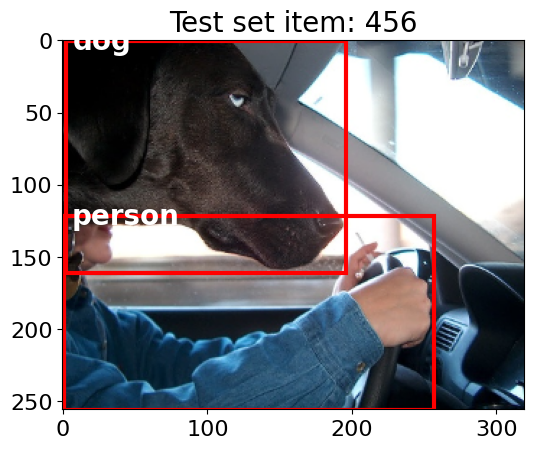

In [4]:
sample_test_img_plot = (128 * (sample_input + 1)).astype(np.uint8)
sample_test_img_plot = sample_test_img_plot.transpose([1, 2, 0])

fig, ax = plt.subplots(1)
ax.imshow(sample_test_img_plot)

plt.tick_params(labelsize=16)
        
subplot_title=("Test set item: " + str(selected_idx))
ax.set_title(subplot_title, fontsize = 20)

# Truth boxes
boxes_resized = [[box[0] * sample_test_img_plot.shape[1], \
                  box[1] * sample_test_img_plot.shape[0], \
                  box[2] * sample_test_img_plot.shape[1], \
                  box[3] * sample_test_img_plot.shape[0]] for box in sample_boxes]

for b in range(len(sample_boxes)):
    bb = boxes_resized[b]
    rect = patches.Rectangle((bb[0], bb[1]), bb[2] - bb[0], bb[3] - bb[1], linewidth=3,
                            edgecolor='r', facecolor="none")
    ax.add_patch(rect)

    ax.text(bb[0] + 5,(bb[1]), sample_labels_strings[b], verticalalignment='center', color='white',fontsize=20,weight='bold')

### Create sample numpy for use in synthesis phases
#### Can also set --save-sample in evaluation script

In [5]:
simulate = True
args = Args(act_mode_8bit=simulate)


_, test_set = \
    pascalvoc.pascal_voc_2007_2012_256_320_aug_get_dataset((data_path, args), load_train=False, load_test=True)

Test dataset length: 4952



In [6]:
selected_idx = 111

sample_item = test_set[selected_idx]
sample_input = sample_item[0].cpu().detach().numpy().astype('int64')

sample_boxes = sample_item[1][0]

sample_labels_ids = sample_item[1][1]
sample_labels_strings = [test_set.voc_id_to_label_map[label_id.item()] for label_id in sample_labels_ids]

print(sample_input.shape)
print(sample_input.dtype)
print([sample_input.min(), sample_input.max()])

print(sample_boxes)
print(sample_labels_ids)
print(sample_labels_strings)

(3, 256, 320)
int64
[-128, 127]
tensor([[0.4400, 0.3475, 0.9460, 1.0000],
        [0.0520, 0.1073, 0.3540, 0.4605]])
tensor([ 8, 20])
['cat', 'tvmonitor']


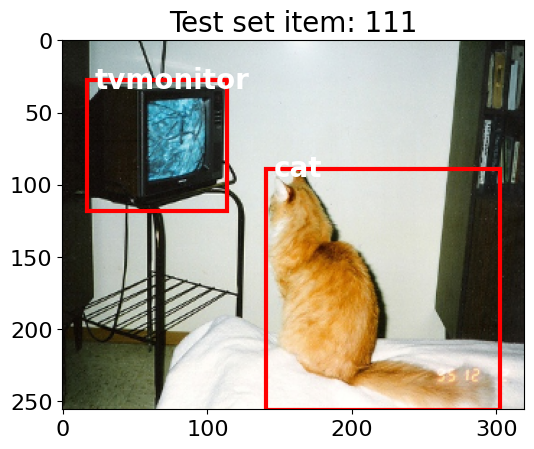

In [7]:
sample_test_img_plot = (sample_input + 128).astype(np.uint8)
sample_test_img_plot = sample_test_img_plot.transpose([1, 2, 0])

fig, ax = plt.subplots(1)
ax.imshow(sample_test_img_plot)

plt.tick_params(labelsize=16)
        
subplot_title=("Test set item: " + str(selected_idx))
ax.set_title(subplot_title, fontsize = 20)

# Truth boxes
boxes_resized = [[box[0] * sample_test_img_plot.shape[1], \
                  box[1] * sample_test_img_plot.shape[0], \
                  box[2] * sample_test_img_plot.shape[1], \
                  box[3] * sample_test_img_plot.shape[0]] for box in sample_boxes]

for b in range(len(sample_boxes)):
    bb = boxes_resized[b]
    rect = patches.Rectangle((bb[0], bb[1]), bb[2] - bb[0], bb[3] - bb[1], linewidth=3,
                            edgecolor='r', facecolor="none")
    ax.add_patch(rect)

    ax.text(bb[0] + 5,(bb[1]), sample_labels_strings[b], verticalalignment='center', color='white',fontsize=20,weight='bold')

In [8]:
outfile = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'ai8x-synthesis', 'tests', 'sample_pascalvoc_256_320.npy')
np.save(outfile, sample_input)